In [13]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [14]:
using JLD2, CairoMakie, GLMakie

In [15]:
cd("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/Сопоставление с матконт/файлы matlab")

I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
u0_hom = u0_hom[:]

I0_hom_st = load("I0_hom_stump.jld")["data"]
u0_hom_st = load("U0_hom_stump.jld")["data"]
I0_hom_st = I0_hom_st[:]
u0_hom_st = u0_hom_st[:];

In [16]:
Λs = load("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/Map LSE/point 2 Kazakov/LSs_400_400_map_Kazakov.jld")["Λs"]
u0s = load("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/Map LSE/point 2 Kazakov/u0s_400_400_map_Kazakov.jld")["u0s"]

U0range = range(0.267, 0.260, length = 400)
I0range = range( -1.7, -1.73,  length = 400)

-1.7:-7.518796992481203e-5:-1.73

In [17]:
cd("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/Сопоставление с матконт/файлы matlab")

I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
u0_hom = u0_hom[:]

I0_hom_st = load("I0_hom_stump.jld")["data"]
u0_hom_st = load("U0_hom_stump.jld")["data"]
I0_hom_st = I0_hom_st[:]
u0_hom_st = u0_hom_st[:]

I0_Fold = load("I0_Fold.jld")["data"]
U0_Fold = load("U0_Fold.jld")["data"]
I0_Fold = I0_Fold[:]
U0_Fold = U0_Fold[:]

I0_hom_bt = load("I0_hom_bt.jld")["data"]
U0_hom_bt = load("U0_hom_bt.jld")["data"]
I0_hom_bt = I0_hom_bt[:]
U0_hom_bt = U0_hom_bt[:];

index_start_hom_bt = 1; index_end_hom_bt = 8000


cd("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/bifurcationkit")

hp_codim2_1 = load("hp_codim2_1.jld2")
hp_codim2_1I0 = hp_codim2_1["I0"]
hp_codim2_1U0 = hp_codim2_1["U0"]

sn_codim2_1 = load("sn_codim2_1.jld2")
sn_codim2_1I0 = sn_codim2_1["I0"]
sn_codim2_1U0 = sn_codim2_1["U0"];

In [21]:
Λs[:, 400, 1]

400-element Vector{Float64}:
  0.001208643142378381
  0.0019377960653941674
 -0.0008922818461698452
  0.002233085356825763
  0.00423801017841684
 -0.0010565025191515791
  0.0032917854100066634
  0.0029078241390150254
 -5.9598772164185444e-5
  0.0022369633410834464
  ⋮
  0.0015950418685959085
 -0.0004230537735662928
 -0.0030734161858028356
 -0.00452403377286779
  0.0010620160531538822
 -0.00042295074214115035
 -0.00036067251580835754
  0.0022954179268939363
  0.0013524685712175463

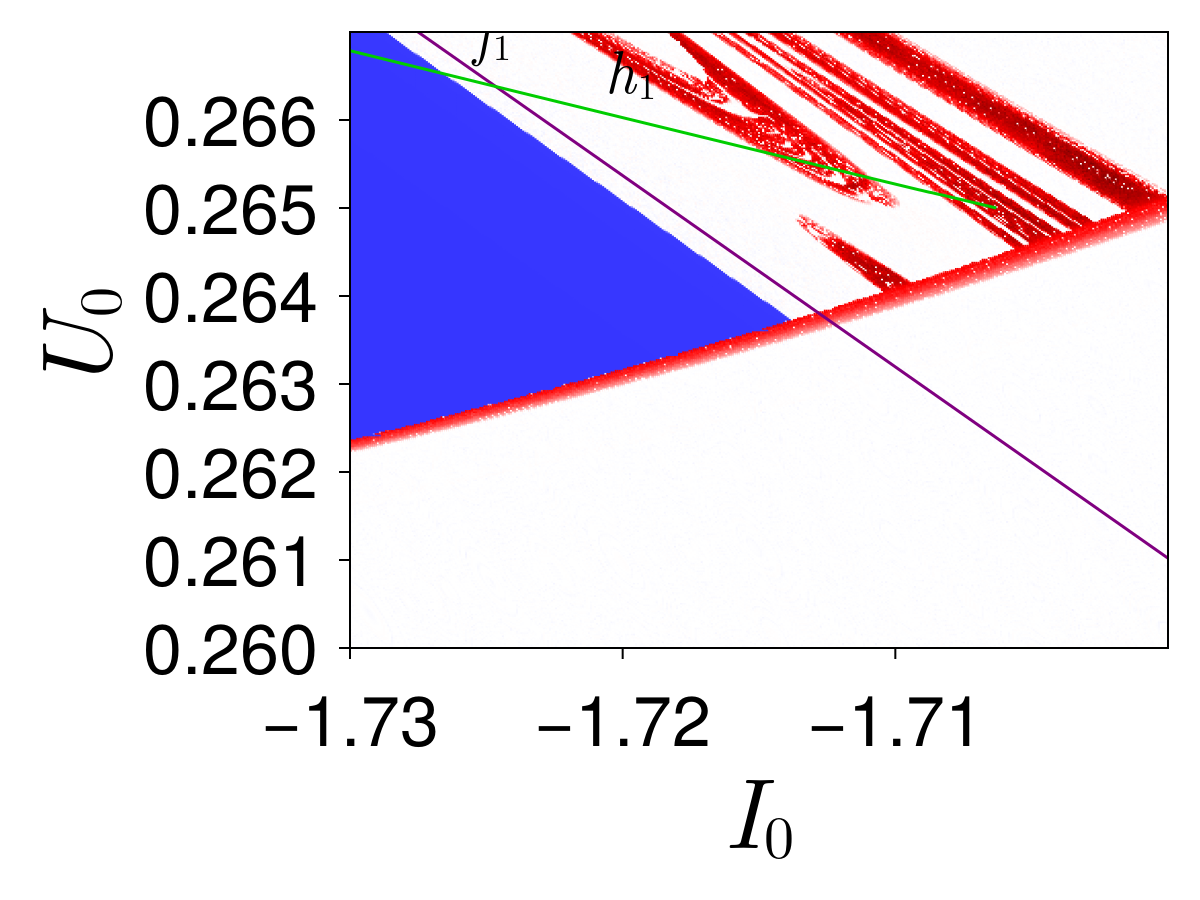

In [23]:
index = 1
absmax = maximum(abs.(Λs[:, :, index]))

mn, mx =  -absmax, absmax
CairoMakie.activate!()
f = Figure()
ticksize = 35
tickpad = 10.0
textsize = 25
textsizecurve = 30
lw = 1.5
mksize = 12

ax = Axis(f[1, 1], xlabel = L"I_0",ylabel = L"U_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)#, xticks = [-1.729, -1.717, -1.705])

hm = heatmap!(ax, I0range, U0range, Λs[:, :, index], colormap = :seismic,
                 colorrange = (mn, mx))

#lines!(ax, hp_codim2_1I0, hp_codim2_1U0, label = "Hopf", color = :magenta)
lines!(ax, sn_codim2_1I0, sn_codim2_1U0, label = "Fold", color = :purple, linewidth = lw)
text!(ax, -1.7255, 0.2666, text = L"f_1", fontsize = textsizecurve)

colorhom = :green3
lines!(ax, I0_hom, u0_hom, label = "Homoclinic", color = colorhom, linewidth = lw)
text!(ax, I0_hom[100], u0_hom[100], text = L"h_1", fontsize = textsizecurve, align = (:right, :bottom), offset = (0, 10))

xlims!(-1.73, -1.7)
ylims!(0.260, 0.267)
display(f);